# Big Data Analysis 1
### Exercise: Data Analytics Mathematics 1 (statistics and distribution) in Jupyter

In this exercise we change to new ping file `google2_ping.txt`. And we'll do some more analysis about it's ping delay values.

#### Step 1: Read the data 
**Task 1:** Read `/bda1/data/google2_ping.txt` to pandas dataframe `google2_df`. 

File is saved with command: `ping -c 100  www.google.com > google2_ping.txt`

**Hint.** You can copy your solutions from Pandas exercise.

In [106]:
## Task 1:
## Your code here
import pandas as pd
import numpy as np

!sed -i '1d' google2_ping.txt
!sed -i "$(( $(wc -l <google2_ping.txt)-3 )),$ d" google2_ping.txt

!sed -i -e 's/[0-9]\{1,3\}\.[0-9]\{1,3\}\.[0-9]\{1,3\}\.[0-9]\{1,3\}//g' google2_ping.txt
!sed -i -e 's/Request timeout for icmp_seq 3/NaN/g' google2_ping.txt
!sed -i -e 's/ ms//g' google2_ping.txt
!sed -i -e 's/64 bytes from : icmp_seq=//g' google2_ping.txt
!sed -i -e 's/ttl=106 time=//g' google2_ping.txt
!sed -i -e 's/[0-9]\{1,2\} //g' google2_ping.txt

ping_data = !cat google2_ping.txt
ping_list = list(np.float_(ping_data))
google2_df = pd.DataFrame(ping_list)
google2_df.head(10)

,0
0,21.046
1,21.106
2,21.680
3,NaN
4,20.835
5,23.113
6,23.078
7,22.396
8,21.617
9,0.287


#### Step 2: Check if the dataframe is correct 
**Task 2:** Plot 'google2_df' dafaframe to see if it is ok. And print it's length. 

(**Hint.** The length should be 100.)

google2_df length is: 100


<AxesSubplot:>

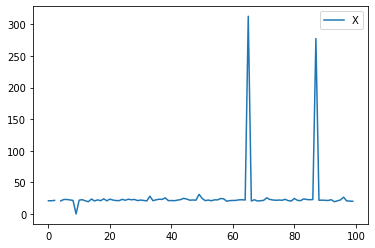

In [156]:
## Task 2:
## Your code here

# print length
## Note. make sure your answer type is integer

google2_df_length = int(len(google2_df))
print("google2_df length is:", google2_df_length)

# plot data
google2_df.plot()

#### Step 3: Data statistics 
Now this 'google2_df' is our dataset. 

**Task 3:** Let's now print following dataset parameters:
1. Count
2. Mean
3. Median
4. Standard deviation
5. IQR
6. Min-value
7. Max-value

With these parameters and data plot you should be able to get fair good understanding about the data.

**Hint for IQR:** https://www.statology.org/interquartile-range-python/ 

In [225]:
## Task 3:
## Your code here
# Note 1. Round all results to 2 decimals
# Note 2. Use np.around() to avoid floating point number rounding problems
# see https://numpy.org/doc/stable/reference/generated/numpy.around.html
google2_df.rename({0: 'X'}, axis=1, inplace=True)
q3, q1 = np.nanpercentile(google2_outl2_df, [75 ,25])

google2_count = np.around(google2_df["X"].count(), 2)
google2_mean = np.around(np.mean(google2_df["X"]), 2)
google2_median = np.around(np.nanmedian(google2_df["X"]), 2)
google2_std = np.around(google2_df["X"].std(), 2)
google2_IQR = np.around(np.nanquantile(google2_df["X"], .75) - \
np.nanquantile(google2_df["X"], .25), 2)
google2_min = np.around(np.min(google2_df["X"]), 2)
google2_max = np.around(np.max(google2_df["X"]), 2) 

print("Count:", google2_count)
print("Mean:", google2_mean)
print("Median:", google2_median)
print("Std:", google2_std)
print("IRQ:", google2_IQR)
print("Min:", google2_min)
print("Max:", google2_max)

Count: 99
Mean: 27.66
Median: 22.08
Std: 38.77
IRQ: 1.86
Min: 0.29
Max: 312.62


#### Step 4: Statistics in a figure  
You can plot data histogram with `df.plot.hist(bins=)` command. 

**Task 4:** Plot histogram with 20 bins. Can you estimate mean value from histogram?

<AxesSubplot:ylabel='Frequency'>

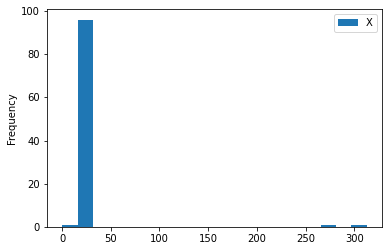

In [226]:
## Task 4:
## Your code here
google2_df.plot.hist(bins=20)

#### Step 5: Outliers - Visual detection
The data seems to be ok, but not quite. Can you visually spot the outliers? How many did you find?

**Task 5:** Remove outliers you visually noticed from dataset, calculate statistics again and plot modified data. 

Count: 96
Mean: 22.37
Median: 22.07
Std: 1.71
IRQ: 1.83
Min: 19.56
Max: 31.21


<AxesSubplot:>

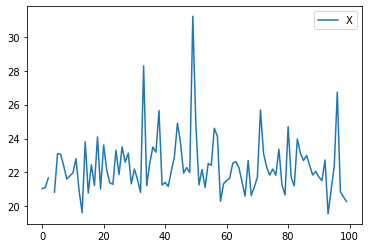

In [221]:
## Task 5:
## Your code here
google2_outl_df = google2_df.copy()
google2_outl_df.rename({0: 'X'}, axis=1, inplace=True)

## Remove outliers you visually noticed from 'google2_outl_df'
google2_outl_df.drop( google2_outl_df[ google2_outl_df['X'] <= 10 ].index, inplace=True)
google2_outl_df.drop( google2_outl_df[ google2_outl_df['X'] >= 250 ].index, inplace=True)

## Calculate statistics again
# Note 1. Round all results to 2 decimals
# Note 2. Use np.around() to avoid floating point number rounding problems
# see https://numpy.org/doc/stable/reference/generated/numpy.around.html

google2_outl_count = np.around(google2_outl_df["X"].count(), 2)
google2_outl_mean = np.around(np.mean(google2_outl_df["X"]), 2)
google2_outl_median = np.around(np.nanmedian(google2_outl_df["X"]), 2)
google2_outl_std = np.around(google2_outl_df["X"].std(), 2) 
google2_outl_IQR = np.around(np.nanquantile(google2_outl_df["X"], .75) - \
np.nanquantile(google2_outl_df["X"], .25), 2)
google2_outl_min = np.around(np.min(google2_outl_df["X"]), 2)
google2_outl_max = np.around(np.max(google2_outl_df["X"]), 2) 

print("Count:", google2_outl_count)
print("Mean:", google2_outl_mean)
print("Median:", google2_outl_median)
print("Std:", google2_outl_std)
print("IRQ:", google2_outl_IQR)
print("Min:", google2_outl_min)
print("Max:", google2_outl_max)

## Plot out the signal
google2_outl_df.plot()

**Task 6:** Plot data histogram again without outliers. What do you notice?

<AxesSubplot:ylabel='Frequency'>

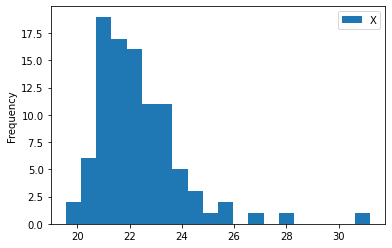

In [188]:
## Task 6:
## Your code here
google2_outl_df.plot.hist(bins=20)

You should see something like this:

<img src=".//bda1_math_answers/ping_distribution.png" width=400px>

***Btw,*** *this is typical ping delay distribution. As you can see, it is not a normal distribution (https://en.wikipedia.org/wiki/Normal_distribution) as white noise distribution. In low end the minimum time is optimal network travel time for IP-packet. And as there is more traffic in the network, there will delayed ping packets that you can see as long tail in the high end.*

#### Step 6: Outliers - Detection with IQR Method 

Get familiar with IQR outlier detection through this article: 
https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097

***Task 7:*** Now use the IQR method (with scale 1.5) and remove outliers from dataset and calculate statistics again. Yes, AGAIN. Sorry...

In [222]:
## Task 7:
## Your code here
google2_outl2_df = google2_df.copy()
google2_outl2_df.rename({0: 'X'}, axis=1, inplace=True)

## Calculate IQR limits
q3, q1 = np.nanpercentile(google2_outl2_df, [75 ,25])
IQR = q3 - q1
low_limit = q1 - 1.5 * IQR
print('low_limit:', low_limit)
high_limit = q3 + 1.5 * IQR 
print('high_limit:', high_limit)

## Remove outliers from 'google2_outl2_df'
google2_outl2_df.drop( google2_outl2_df[ google2_outl2_df['X'] <= 18.4645 ].index, inplace=True)
google2_outl2_df.drop( google2_outl2_df[ google2_outl2_df['X'] >= 25.9165 ].index, inplace=True)

## Calculate statistics again
# Note 1. Round all results to 2 decimals
# Note 2. Use np.around() to avoid floating point number rounding problems
# see https://numpy.org/doc/stable/reference/generated/numpy.around.html

google2_outl2_count = np.around(google2_outl2_df["X"].count(), 2)
google2_outl2_mean = np.around(np.mean(google2_outl2_df["X"]), 2)
google2_outl2_median = np.around(np.nanmedian(google2_outl2_df["X"]), 2)
google2_outl2_std = np.around(google2_outl2_df["X"].std(), 2) 
google2_outl_IQR = np.around(np.nanquantile(google2_outl2_df["X"], .75) - \
np.nanquantile(google2_outl2_df["X"], .25), 2)
google2_outl2_min = np.around(np.min(google2_outl2_df["X"]), 2)
google2_outl2_max = np.around(np.max(google2_outl2_df["X"]), 2) 

print("Count:", google2_outl_count)
print("Mean:", google2_outl_mean)
print("Median:", google2_outl2_median)
print("Std:", google2_outl2_std)
print("IRQ:", google2_outl2_IQR)
print("Min:", google2_outl2_min)
print("Max:", google2_outl2_max)

low_limit: 18.4645
high_limit: 25.9165
Count: 96
Mean: 22.37
Median: 22.0
Std: 1.25
IRQ: 1.86
Min: 19.56
Max: 25.68


***Task 8:*** And print also the data plot and histogram for continuity.

<AxesSubplot:ylabel='Frequency'>

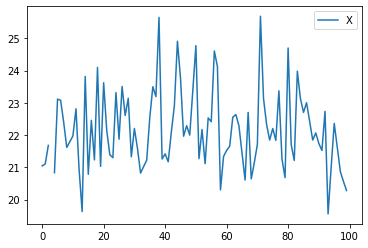

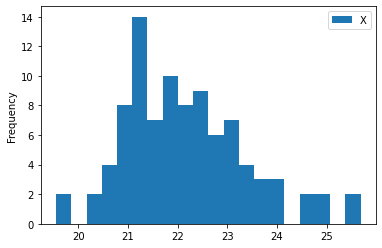

In [190]:
## Task 8:
## Print data plot and histogram
google2_outl2_df.plot()
google2_outl2_df.plot.hist(bins=20)

### Reflection

Answer following questions:
1. What is the challenge with mean and std, when you do data analysis? 
2. What is IQR?
3. What is outlier?
4. Compare these 3 different datasets:
    - How you should calculate mean?
    - What about deviation?
    - And when you can say that this value is outlier?


2. IQR on datan jakautumisen mittari, eli missä datasetin keskipiste ja neljännekset sijaitsevat. 
3. Datapiste, joka eroaa huomattavasti muista datapisteistä.


### Check your answers by running following cell:

In [224]:
# Do not change this code!

import importlib
import bda1_math1_check
importlib.reload(bda1_math1_check)

print("Results:")

print("PART 'google2_df_length':")
correct = bda1_math1_check.check_length(google2_df_length)
print("\t Correct answers", correct, "/ 1.")

print("PART 'check_google2_df':")
correct = bda1_math1_check.check_google2(google2_count, 
         google2_mean, google2_median, google2_std, google2_IQR, google2_min, google2_max)
print("\t Correct answers", correct, "/ 7.")

print("PART 'check_google2_outl_df':")
correct = bda1_math1_check.check_google2_outl(google2_outl_count, google2_outl_mean, google2_outl_median, google2_outl_std, 
         google2_outl_IQR, google2_outl_min, google2_outl_max)
print("\t Correct answers", correct, "/ 7.")

print("PART 'check_google2_outl2_df':")
correct = bda1_math1_check.check_google2_outl2(google2_outl2_count, google2_outl2_mean, google2_outl2_median, google2_outl2_std,
         google2_outl2_IQR, google2_outl2_min, google2_outl2_max)
print("\t Correct answers", correct, "/ 7.")




Results:
PART 'google2_df_length':
	 Correct answers 1 / 1.
PART 'check_google2_df':
	 'google2_IQR' is not correct. Please check your answer.
	 Correct answers 6 / 7.
PART 'check_google2_outl_df':
	 'google2_outl_IQR' is not correct. Please check your answer.
	 Correct answers 6 / 7.
PART 'check_google2_outl2_df':
	 'google2_outl2_IQR' is not correct. Please check your answer.
	 Correct answers 6 / 7.


### Nice work! 